<a href="https://colab.research.google.com/github/al2501/fooddesert/blob/main/Linear_regressions_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Files

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CorrectedFastFoodData (2).csv to CorrectedFastFoodData (2).csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 5-a-day.csv to 5-a-day.csv


# Cleaning and merging the fast food and 5 a day data sets




In [ ]:
import pandas as pd



In [ ]:
data1=pd.read_csv('/content/CorrectedFastFoodData (2).csv')
print(data1)

In [ ]:
data1_clean = data1.drop(data1[data1.columns.difference(['LA Code','Rate per 100,000 population'])], axis=1)
data1_clean = data1_clean.sort_values(by ='LA Code')
data1_clean = data1_clean.dropna()
data1_clean.set_index('LA Code', inplace=True)
print(data1_clean)

In [ ]:
data2=pd.read_csv('/content/5-a-day.csv')
print(data2)

In [ ]:
data2_clean = data2.drop(data2[data2.columns.difference(['Area Code', 'Value'])], axis=1)
data2_clean.rename(columns={'Area Code': 'LA Code'}, inplace=True)
data2_clean = data2_clean.sort_values(by ='LA Code')
data2_clean.set_index('LA Code', inplace=True)
print(data2_clean)

In [ ]:
df_joined = data1_clean.merge(data2_clean, left_index=True, right_index=True)
df_joined

In [ ]:
df_joined.rename(columns={'Rate per 100,000 population': 'Fast food outlet rate'}, inplace=True)
df_joined.rename(columns={'Value': '5 a day percentage'}, inplace=True)
df_joined

In [ ]:
df_joined.to_csv ('df_joined.csv')

# Linear Regression: Fast food outlets and 5 a day

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sms

data = pd.read_csv('/content/df_joined.csv')

data.describe()

In [ ]:
x = data['Fast food outlet rate']
y = data['5 a day percentage']

plt.scatter(x,y)
plt.xlabel('Fast Food Outlet Rate, by Local Authority, 2017', fontsize = 15)
plt.ylabel('Percentage of the Population Regularly Consuming their Five a Day, by Local Authority, 2019', fontsize = 20)
plt.show()

In [ ]:
x_values = data['Fast food outlet rate']
y_values = data['5 a day percentage']
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()

print(regression_model_b.summary())
print() 

In [ ]:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue


print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

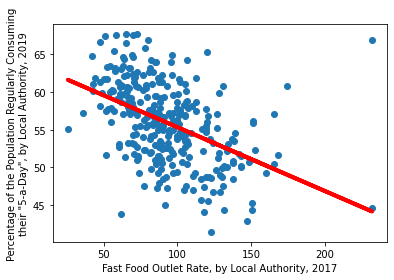

In [ ]:
plot = plt.scatter(x,y)
yhat = gradient*x + intercept
fig = plt.plot(x,yhat, lw=4, c='red', label = 'regression line')

plt.xlabel('Fast Food Outlet Rate, by Local Authority, 2017', fontsize = 10)
plt.ylabel('Percentage of the Population Regularly Consuming\ntheir "5-a-Day", by Local Authority, 2019', fontsize = 10)
#fig.savefig('output.png')
plt.show()

In [ ]:
plt.savefig("output.jpg")



<Figure size 432x288 with 0 Axes>

# Food deserts and 5 a day: Merging + Linear Regression

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving geofood_final.csv to geofood_final.csv


In [ ]:
data3 = pd.read_csv('/content/geofood_final.csv')
print(data3)
    

In [ ]:
data3_clean = data3.drop(data3[data3.columns.difference(['LAD20CD', 'Score'])], axis=1)
data3_clean.rename(columns={'LAD20CD': 'LA Code'}, inplace=True)
data3_clean.rename(columns={'Score': 'Food desert score'}, inplace=True)
data3_clean = data3_clean.sort_values(by ='LA Code')
data3_clean.set_index('LA Code', inplace=True)
print(data3_clean)

In [ ]:
data2_clean.rename(columns={'Value': '5 a day percentage'}, inplace=True)
print(data2_clean)

In [ ]:
df_joined2 = data3_clean.merge(data2_clean, left_index=True, right_index=True)
print(df_joined2)

In [ ]:
df_joined2.to_csv ('df_joined2.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sms

data = pd.read_csv('/content/df_joined2.csv')

data.describe()

In [ ]:
x = data['Food desert score']
y = data['5 a day percentage']

plt.scatter(x,y)
plt.xlabel('Fast Food Outlet Rate, by Local Authority, 2017', fontsize = 15)
plt.ylabel('Percentage of the Population Regularly Consuming their Five a Day, by Local Authority, 2019', fontsize = 20)
plt.show()

In [ ]:
x_values = data['Food desert score']
y_values = data['5 a day percentage']
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()

print(regression_model_b.summary())
print() 

In [ ]:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue


print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

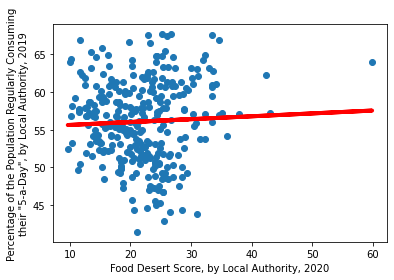

In [ ]:
plt.scatter(x,y)
yhat = gradient*x + intercept
fig = plt.plot(x,yhat, lw=4, c='red', label = 'regression line')

plt.xlabel('Food Desert Score, by Local Authority, 2020', fontsize = 10)
plt.ylabel('Percentage of the Population Regularly Consuming\ntheir "5-a-Day", by Local Authority, 2019', fontsize = 10)
plt.show()